# Assessing the correlation between Precipitation and NDVI Anomalies Detected

In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

## Data access

In [2]:
ndvi_df=pd.read_csv(r'D:\PhD\GIS\DP\NDVI\NDVI_TimeSerie_Csv.csv')
ndvi_df.head()

,date,ndvi,doy
0,2020-01-09,0.1159,9
1,2020-01-25,0.1163,25
2,2020-02-10,0.1189,41
3,2020-02-26,0.1084,57
4,2020-03-13,0.1184,73


In [10]:
dataset = xr.open_zarr(r"D:\PhD\GIS\DP\Precip\zarr_file")
chirps_2020_2025=dataset.sel(time=slice('2020-01-09', '2025-01-25'))

In [11]:
chirps_2020_2025.precipitation

<xarray.DataArray 'precipitation' (time: 1722, y: 54, x: 111)> Size: 83MB
dask.array<getitem, shape=(1722, 54, 111), dtype=float64, chunksize=(1722, 7, 28), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 432B -23.18 -23.23 -23.28 ... -25.73 -25.78 -25.83
  * x        (x) float64 888B 14.48 14.53 14.58 14.63 ... 19.88 19.93 19.98
  * time     (time) datetime64[ns] 14kB 2020-01-09 2020-01-10 ... 2025-01-25
Attributes:
    TIFFTAG_DOCUMENTNAME:      /home/sandbox/chirps/v2.0/daily_downscaled_by_...
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_SOFTWARE:          IDL 8.5, Exelis Visual Information Solutions, ...
    TIFFTAG_DATETIME:          2015:09:01 17:10:36
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    OVR_RESAMPLING_ALG:        NEAREST
    AREA_OR_POINT:             Area
    grid_mapping:              spatial_ref

In [12]:
point_ts=chirps_2020_2025.sel(x=16.2456,y=-28.0674,method='nearest')

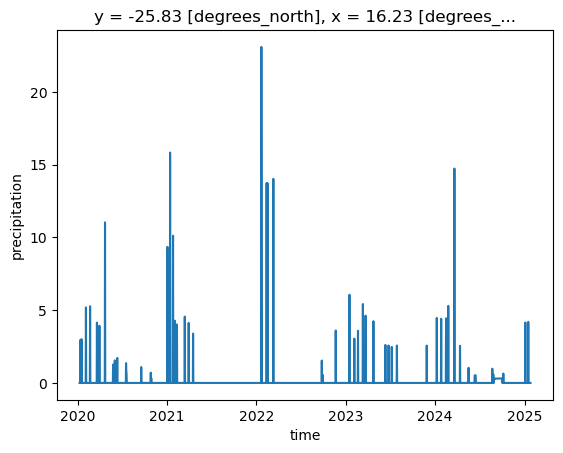

In [13]:
point_ts.precipitation.plot()

In [14]:
point_ts.precipitation

<xarray.DataArray 'precipitation' (time: 1722)> Size: 14kB
dask.array<getitem, shape=(1722,), dtype=float64, chunksize=(1722,), chunktype=numpy.ndarray>
Coordinates:
    y        float64 8B -25.83
    x        float64 8B 16.23
  * time     (time) datetime64[ns] 14kB 2020-01-09 2020-01-10 ... 2025-01-25
Attributes:
    TIFFTAG_DOCUMENTNAME:      /home/sandbox/chirps/v2.0/daily_downscaled_by_...
    TIFFTAG_IMAGEDESCRIPTION:  IDL TIFF file
    TIFFTAG_SOFTWARE:          IDL 8.5, Exelis Visual Information Solutions, ...
    TIFFTAG_DATETIME:          2015:09:01 17:10:36
    TIFFTAG_XRESOLUTION:       100
    TIFFTAG_YRESOLUTION:       100
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    OVR_RESAMPLING_ALG:        NEAREST
    AREA_OR_POINT:             Area
    grid_mapping:              spatial_ref

In [15]:
precipipation_mean=point_ts.precipitation.where(point_ts.precipitation >=0)

In [28]:
precipipation_mean.to_dataframe().reset_index().to_csv(r'D:\PhD\GIS\DP\Precip\chirps_2020_2025.csv', index=False)

In [16]:
Precipitation_df=pd.read_csv(r'D:\PhD\GIS\DP\Precip\chirps_2020_2025.csv')

In [17]:
Precipitation_df

,time,y,x,precipitation
0,2020-01-09,-25.825001,16.225001,0.000000
1,2020-01-10,-25.825001,16.225001,0.000000
2,2020-01-11,-25.825001,16.225001,0.000000
3,2020-01-12,-25.825001,16.225001,0.000000
4,2020-01-13,-25.825001,16.225001,2.965147
...,...,...,...,...
1717,2025-01-21,-25.825001,16.225001,0.000000
1718,2025-01-22,-25.825001,16.225001,0.000000
1719,2025-01-23,-25.825001,16.225001,0.000000
1720,2025-01-24,-25.825001,16.225001,0.000000


## Correlation between Precipitation & NDVI

### Align the two dataset

In [18]:
ndvi_path=r'D:\PhD\GIS\DP\NDVI\NDVI_TimeSerie_Csv.csv'
precipitation_path=r'D:\PhD\GIS\DP\Precip\chirps_2020_2025.csv'

In [19]:
chirps = pd.read_csv(precipitation_path)
ndvi   = pd.read_csv(ndvi_path)

In [20]:
chirps.head()

,time,y,x,precipitation
0,2020-01-09,-25.825001,16.225001,0.000000
1,2020-01-10,-25.825001,16.225001,0.000000
2,2020-01-11,-25.825001,16.225001,0.000000
3,2020-01-12,-25.825001,16.225001,0.000000
4,2020-01-13,-25.825001,16.225001,2.965147


In [21]:
ndvi.head()

,date,ndvi,doy
0,2020-01-09,0.1159,9
1,2020-01-25,0.1163,25
2,2020-02-10,0.1189,41
3,2020-02-26,0.1084,57
4,2020-03-13,0.1184,73


In [22]:
len(ndvi)

117

In [23]:
chirps['time'] = pd.to_datetime(chirps['time'])
ndvi['date']   = pd.to_datetime(ndvi['date'])

In [24]:
chirps = chirps.sort_values('time').reset_index(drop=True)
ndvi   = ndvi.sort_values('date').reset_index(drop=True)

In [25]:
start = chirps['time'].min()
end   = chirps['time'].max()
full_range = pd.date_range(start=start, end=end, freq='D')

In [26]:
chirps_filled = (
    chirps.set_index('time')
          .reindex(full_range)
          .fillna(0.0)
          .rename_axis('time')
          .reset_index()
)
chirps_filled

,time,y,x,precipitation
0,2020-01-09,-25.825001,16.225001,0.000000
1,2020-01-10,-25.825001,16.225001,0.000000
2,2020-01-11,-25.825001,16.225001,0.000000
3,2020-01-12,-25.825001,16.225001,0.000000
4,2020-01-13,-25.825001,16.225001,2.965147
...,...,...,...,...
1839,2025-01-21,-25.825001,16.225001,0.000000
1840,2025-01-22,-25.825001,16.225001,0.000000
1841,2025-01-23,-25.825001,16.225001,0.000000
1842,2025-01-24,-25.825001,16.225001,0.000000


In [27]:
precip_sums = []
for i in range(len(ndvi)):
    start_i = ndvi.loc[i, 'date']
    if i < len(ndvi) - 1:
        end_i = ndvi.loc[i+1, 'date']
        mask = (chirps_filled['time'] >= start_i) & (chirps_filled['time'] < end_i)
    else:
        mask = (chirps_filled['time'] >= start_i)
    precip_sums.append(chirps_filled.loc[mask, 'precipitation'].sum())

ndvi_aligned = ndvi.copy()
ndvi_aligned['precip_interval_sum'] = precip_sums

In [28]:
ndvi_aligned

,date,ndvi,doy,precip_interval_sum
0,2020-01-09,0.1159,9,5.968839
1,2020-01-25,0.1163,25,5.196215
2,2020-02-10,0.1189,41,5.269748
3,2020-02-26,0.1084,57,0.000000
4,2020-03-13,0.1184,73,4.144122
...,...,...,...,...
112,2024-11-24,0.1268,329,0.000000
113,2024-12-10,0.1165,345,0.000000
114,2024-12-26,0.1224,361,4.151274
115,2025-01-09,0.1206,9,4.200413


In [65]:
anomaly_dates = pd.to_datetime([
    "2023-07-04","2023-07-20","2023-08-05","2023-08-21",
    "2023-09-06","2023-09-22","2023-10-08","2023-10-24",
    "2023-11-09","2023-11-25","2023-12-11","2023-12-27","2024-01-09"
])
anom = ndvi_aligned[ndvi_aligned['date'].isin(anomaly_dates)].copy()
anom

,date,ndvi,doy,precip_interval_sum
80,2023-07-04,0.2000,185,2.474614
81,2023-07-20,0.2588,201,2.572040
82,2023-08-05,0.3665,217,0.000000
83,2023-08-21,0.4248,233,0.000000
84,2023-09-06,0.3876,249,0.000000
85,2023-09-22,0.3761,265,0.000000
86,2023-10-08,0.3841,281,0.000000
87,2023-10-24,0.2795,297,0.000000
88,2023-11-09,0.2438,313,0.000000
89,2023-11-25,0.2007,329,2.563025


### Assessing the time rain and effect (lag)

In [66]:
max_lag = 6   # change as needed
lags = list(range(0, max_lag + 1))
lag_corrs = []

for k in lags:
    shifted = anom['precip_interval_sum'].shift(k)
    corr = anom['ndvi'].corr(shifted)
    lag_corrs.append(round(corr,2))

lag_tbl = pd.DataFrame({
    'lag_intervals': lags,
    'lag_days_approx': [k*16 for k in lags],
    'correlation': lag_corrs
})

In [67]:
lag_tbl

,lag_intervals,lag_days_approx,correlation
0,0,0,-0.55
1,1,16,-0.39
2,2,32,0.20
3,3,48,0.31
4,4,64,0.70
5,5,80,0.90
6,6,96,0.86


In [68]:
print("\nLagged correlations (anomalies only):")
print(lag_tbl.to_string(index=False))

best_idx = lag_tbl['correlation'].idxmax()
best_lag = int(lag_tbl.loc[best_idx, 'lag_intervals'])
best_corr = float(lag_tbl.loc[best_idx, 'correlation'])
print(f"\nBest lag = {best_lag} intervals (~{best_lag*16} days), correlation = {best_corr:.2f}")


Lagged correlations (anomalies only):
 lag_intervals  lag_days_approx  correlation
             0                0        -0.55
             1               16        -0.39
             2               32         0.20
             3               48         0.31
             4               64         0.70
             5               80         0.90
             6               96         0.86

Best lag = 5 intervals (~80 days), correlation = 0.90


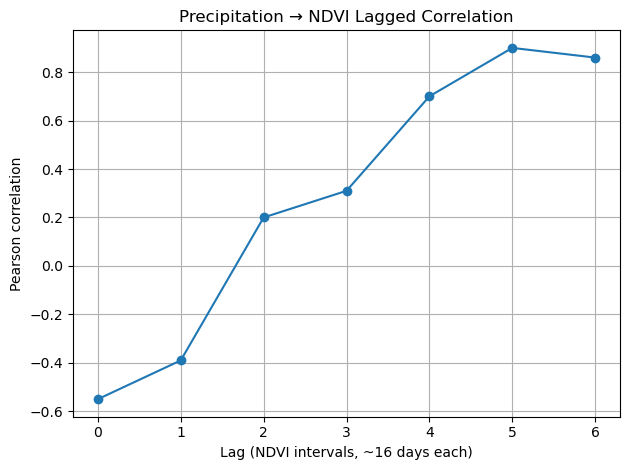

In [69]:
plt.figure()
plt.plot(lag_tbl['lag_intervals'], lag_tbl['correlation'], marker='o')
plt.title("Precipitation → NDVI Lagged Correlation")
plt.xlabel("Lag (NDVI intervals, ~16 days each)")
plt.ylabel("Pearson correlation")
plt.grid(True)
plt.tight_layout()

out_png = "lag_corr_anomalies.png"
plt.savefig(out_png, dpi=150)
plt.show()


## Correlation between Precipitation & EVI

## Align the two datasets

In [46]:
evi_path=r'D:\PhD\GIS\DP\NDVI\EVI_TimeSerie_Csv.csv'
precipitation_path=r'D:\PhD\GIS\DP\Precip\chirps_2020_2025.csv'

In [47]:
chirps = pd.read_csv(precipitation_path)
evi   = pd.read_csv(evi_path)

In [48]:
chirps.head()

,time,y,x,precipitation
0,2020-01-09,-25.825001,16.225001,0.000000
1,2020-01-10,-25.825001,16.225001,0.000000
2,2020-01-11,-25.825001,16.225001,0.000000
3,2020-01-12,-25.825001,16.225001,0.000000
4,2020-01-13,-25.825001,16.225001,2.965147


In [49]:
evi.head()

,date,evi,doy
0,2020-01-09,0.0717,9
1,2020-01-25,0.0712,25
2,2020-02-10,0.0699,41
3,2020-02-26,0.0641,57
4,2020-03-13,0.0705,73


In [50]:
len(evi)

117

In [51]:
chirps['time'] = pd.to_datetime(chirps['time'])
evi['date']   = pd.to_datetime(evi['date'])

In [52]:
chirps = chirps.sort_values('time').reset_index(drop=True)
evi   = evi.sort_values('date').reset_index(drop=True)

In [53]:
start = chirps['time'].min()
end   = chirps['time'].max()
full_range = pd.date_range(start=start, end=end, freq='D')

In [54]:
chirps_filled = (
    chirps.set_index('time')
          .reindex(full_range)
          .fillna(0.0)
          .rename_axis('time')
          .reset_index()
)
chirps_filled

,time,y,x,precipitation
0,2020-01-09,-25.825001,16.225001,0.000000
1,2020-01-10,-25.825001,16.225001,0.000000
2,2020-01-11,-25.825001,16.225001,0.000000
3,2020-01-12,-25.825001,16.225001,0.000000
4,2020-01-13,-25.825001,16.225001,2.965147
...,...,...,...,...
1839,2025-01-21,-25.825001,16.225001,0.000000
1840,2025-01-22,-25.825001,16.225001,0.000000
1841,2025-01-23,-25.825001,16.225001,0.000000
1842,2025-01-24,-25.825001,16.225001,0.000000


In [55]:
precip_sums = []
for i in range(len(evi)):
    start_i = evi.loc[i, 'date']
    if i < len(evi) - 1:
        end_i = evi.loc[i+1, 'date']
        mask = (chirps_filled['time'] >= start_i) & (chirps_filled['time'] < end_i)
    else:
        mask = (chirps_filled['time'] >= start_i)
    precip_sums.append(chirps_filled.loc[mask, 'precipitation'].sum())

evi_aligned = evi.copy()
evi_aligned['precip_interval_sum'] = precip_sums

In [56]:
evi_aligned

,date,evi,doy,precip_interval_sum
0,2020-01-09,0.0717,9,5.968839
1,2020-01-25,0.0712,25,5.196215
2,2020-02-10,0.0699,41,5.269748
3,2020-02-26,0.0641,57,0.000000
4,2020-03-13,0.0705,73,4.144122
...,...,...,...,...
112,2024-11-24,0.0721,329,0.000000
113,2024-12-10,0.0702,345,0.000000
114,2024-12-26,0.0699,361,4.151274
115,2025-01-09,0.0666,9,4.200413


In [57]:
anomaly_dates = pd.to_datetime([
    "2023-07-04","2023-07-20","2023-08-05","2023-08-21",
    "2023-09-06","2023-09-22","2023-10-08","2023-10-24",
    "2023-11-09"
])
anom = evi_aligned[evi_aligned['date'].isin(anomaly_dates)].copy()
anom

,date,evi,doy,precip_interval_sum
80,2023-07-04,0.1229,185,2.474614
81,2023-07-20,0.1614,201,2.572040
82,2023-08-05,0.2482,217,0.000000
83,2023-08-21,0.2876,233,0.000000
84,2023-09-06,0.2521,249,0.000000
85,2023-09-22,0.2500,265,0.000000
86,2023-10-08,0.2533,281,0.000000
87,2023-10-24,0.1815,297,0.000000
88,2023-11-09,0.1473,313,0.000000


### Assess the time between rain and greening

In [61]:
max_lag = 6# change as needed
lags = list(range(0, max_lag + 1))
lag_corrs = []

for k in lags:
    shifted = anom['precip_interval_sum'].shift(k)
    corr = anom['evi'].corr(shifted)
    lag_corrs.append(round(corr,2))

lag_tbl = pd.DataFrame({
    'lag_intervals': lags,
    'lag_days_approx': [k*16 for k in lags],
    'correlation': lag_corrs
})

In [62]:
print("\nLagged correlations (anomalies only):")
print(lag_tbl.to_string(index=False))

best_idx = lag_tbl['correlation'].idxmax()
best_lag = int(lag_tbl.loc[best_idx, 'lag_intervals'])
best_corr = float(lag_tbl.loc[best_idx, 'correlation'])
print(f"\nBest lag = {best_lag} intervals (~{best_lag*16} days), correlation = {best_corr:.2f}")


Lagged correlations (anomalies only):
 lag_intervals  lag_days_approx  correlation
             0                0        -0.67
             1               16        -0.20
             2               32         0.52
             3               48         0.60
             4               64         0.63
             5               80         0.96
             6               96         0.73

Best lag = 5 intervals (~80 days), correlation = 0.96


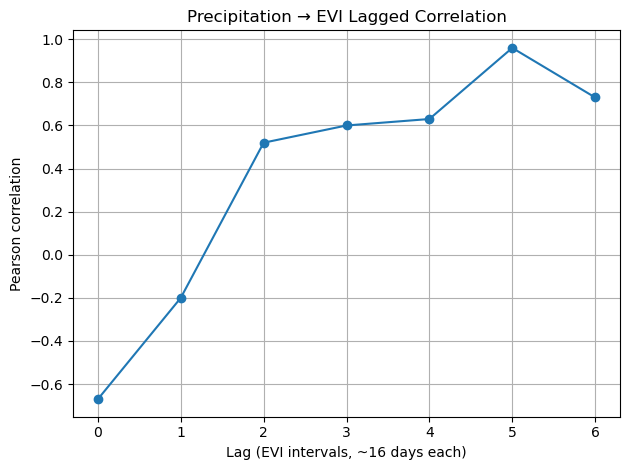

In [63]:
plt.figure()
plt.plot(lag_tbl['lag_intervals'], lag_tbl['correlation'], marker='o')
plt.title("Precipitation → EVI Lagged Correlation")
plt.xlabel("Lag (EVI intervals, ~16 days each)")
plt.ylabel("Pearson correlation")
plt.grid(True)
plt.tight_layout()
plt.show()
